# linear regression

## Study hours data set

### import importnant libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading and intial analysis of data

In [28]:
data=pd.read_csv('/content/session_1_ML_data_Linear_regression.csv') #read the data set as CSV file

In [29]:
data.head(5) #show me the first 5 rows in data set

,study_Hours,Test_scores
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [30]:
data.shape #give me the shape of data

(99, 2)

In [31]:
#separate the two columns of data into x,y
x=data['study_Hours']
y=data['Test_scores']

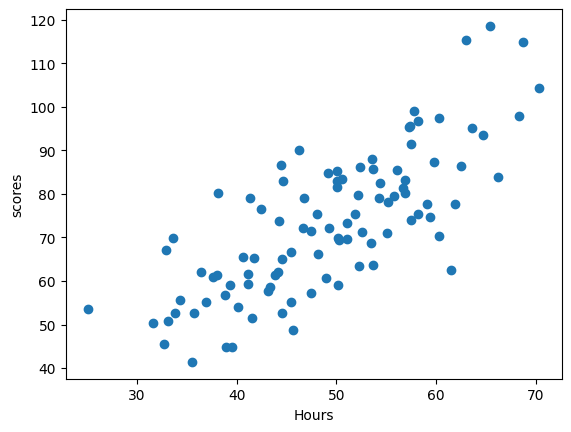

In [32]:
#visualize the scatter plotting of x,y
plt.scatter(x,y)
plt.xlabel('Hours')
plt.ylabel('scores')
plt.show()

### *linear regression Functions*

cost function which give me mean square error

In [33]:
def cost_func(data,a0,a1):
  MSE=0
  x=data['study_Hours'].values
  y=data['Test_scores'].values
  n=len(y)
  y_predicted= a0 +a1*x
  for i in range(len(y)):
      MSE += ((1/n)*((y[i]-y_predicted[i])**2))
  return MSE


gradient descent fuction  which is my optomizer to update a_0 & a_1

In [34]:
def gradient_descent(data,a0,a1,lr):

        n=len(data)
        x=data['study_Hours'].values
        y=data['Test_scores'].values
        y_predicted= a0 +a1*x
        d_a0=(2/n)*((y-y_predicted)).sum()
        d_a1=(2/n)*((y-y_predicted)*x).sum()

        a0_new=a0+lr*d_a0
        a1_new=a1+lr*d_a1

        return a0_new,a1_new


In [35]:
gradient_descent(data,2,1,.001)

(2.0440498232050506, 3.216933668014103)

Iterate function which update a_0 & a_1 with agiven number of iteration to get the lowest cost,and best a_0 & a_1

In [36]:
def iterate(data, a0, a1, lr, No_of_iteration):
    cost = []

    for i in range(No_of_iteration):
        a0_new, a1_new = gradient_descent(data, a0, a1, lr)
        cost.append(cost_func(data, a0_new, a1_new))
        a0=a0_new
        a1=a1_new

    return cost, a0_new, a1_new




In [37]:
lr = 0.0001
No_of_iteration = 10
starting_a0 = 0
stating_a1 = 0

In [38]:
cost,best_a0,best_a1= iterate(data,starting_a0,stating_a1,lr,No_of_iteration)
print('the lowest cost is ',min(cost))
print('best a0 & a1=',best_a0,best_a1)

the lowest cost is  111.06788810058573
best a0 & a1= 0.02973927502614487 1.4796456270098886


visualize the final model

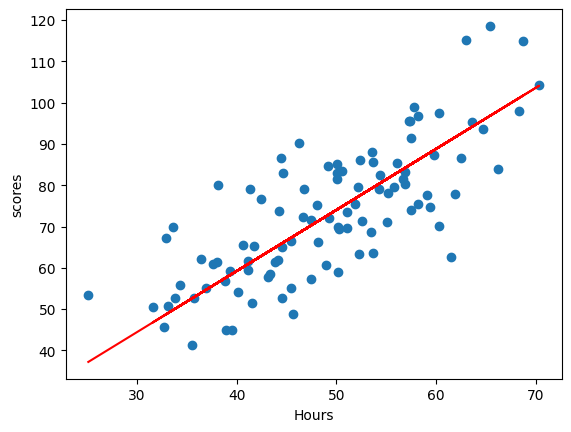

In [39]:
plt.scatter(x,y)
y_pred = best_a0 + best_a1*x
plt.plot(x, y_pred,c='r')
plt.xlabel('Hours')
plt.ylabel('scores')
plt.show()

### visualize relation between number of iteration , MSE & learning rate

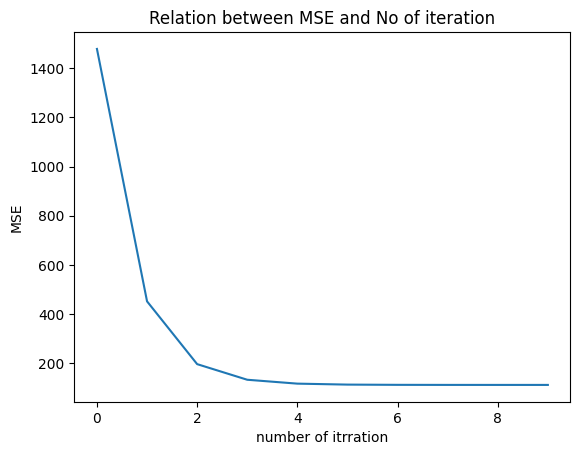

In [40]:
mse,a0_new,a1_new=iterate(data,starting_a0,stating_a1,.0001,No_of_iteration)
plt.plot(mse)

plt.title('Relation between MSE and No of iteration')
plt.xlabel('number of itrration')
plt.ylabel('MSE')

plt.show()

Build afunction to visualize multi models with different learning rate

In [41]:
def multi_lr(lr_range,iteration):
  plt.figure(figsize=(12, 6))

  for i in range (len(lr_range)):
   mse[i],a0_new,a1_new=iterate(data,starting_a0,stating_a1,lr_range[i],iteration)
   plt.plot(mse[i],label=lr_range[i])

   plt.title('Relation between MSE and No of iteration for multi learning rate')
   plt.xlabel('number of itrration')
   plt.ylabel('MSE')
   plt.legend()
   #plt.text(No_of_iteration, mse[i][-1], lr_range[i], ha='left')




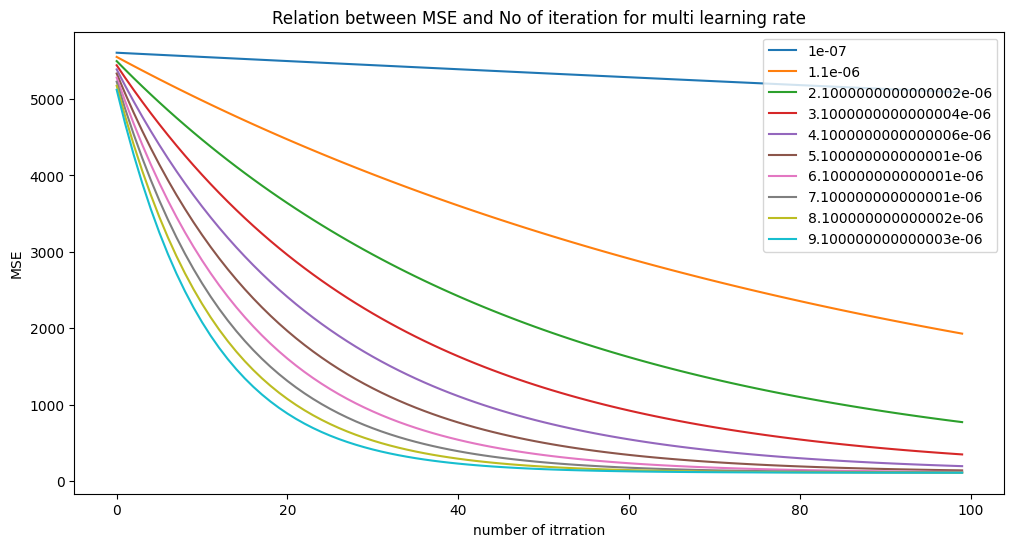

In [42]:
lr_range=np.arange(.0000001,.00001,.0000010)
multi_lr(lr_range,100)

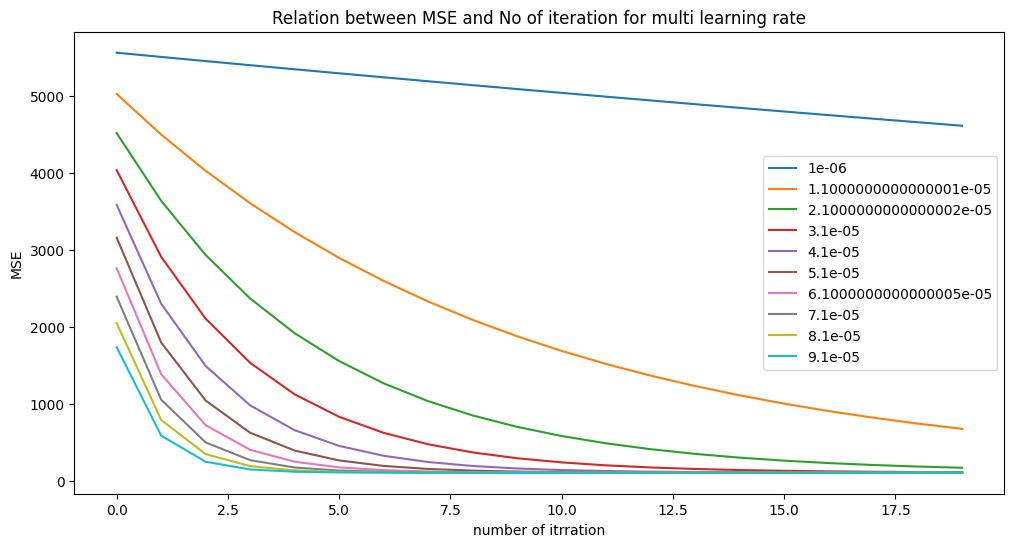

In [43]:
lr_range=np.arange(.000001,.0001,.000010)
multi_lr(lr_range,20)

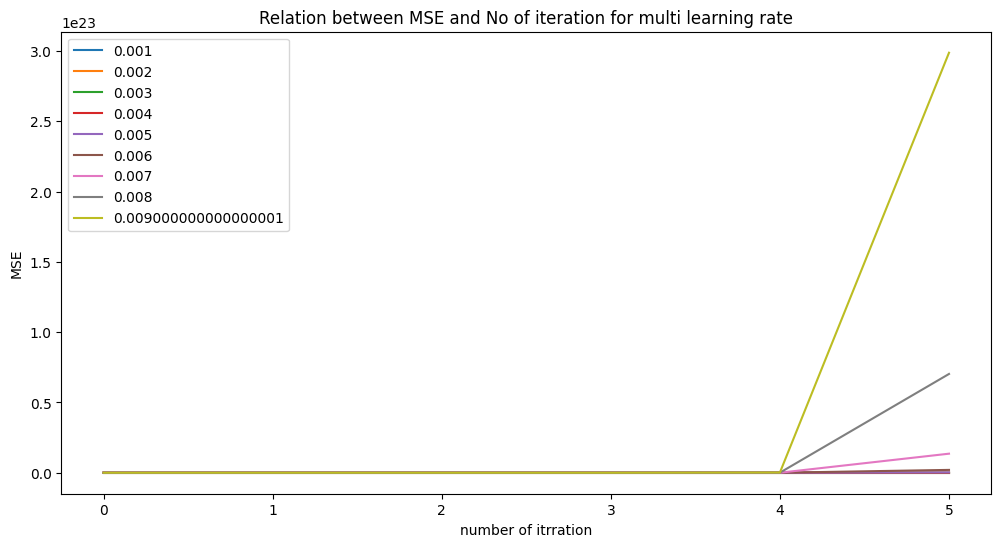

In [44]:
lr_range=np.arange(.001,.01,.001)
multi_lr(lr_range,6)

**the previous figures shows me the relation between mse & number of iterations with diffrent learning rates :**

- when the leaning rate increase the mean square error reachs to lower value with lower number of iteration
- when the learning rate decrease the model reachs to the lowest MSE slowly so it need more number of iteration to reach to the lowest MSE
- learning rate must be with accepted  range :
  * mustn't by so large as  MSE will be increse
  * mustn't by so so small  to avoid over fitting as the model will large number of iteration to reach to lowest MSE
- the learning rate accepted range will differ from data set to another so we will try another data set to show the diffrence
